# Séries Temporais

- Uma série temporal é uma única variável

- Supõe-se que exista alguma dependência entre os intervalos (auto correlação)

- Deve estar relacionada a um intervalo regular de tempo

- Dependência (ordem) no tempo

- Não é possível analisar mais de uma amostra a cada intervalo

- Estudar o comportamento de uma variável contínua ao longo do tempo

- O intervalo de coleta é feita de forma regular

- O intervalo deve ser o mesmo - único em toda a série
  * Ex.: milissegundo, dias, horas, semanas, meses

#### - Por que analisar séries temporais?
  * Explicação/compreensão de características importantes
  * Previsão
  * Controle

#### - Aplicações:
  * Econometria
  * Previsão do tempo
  * Previsões financeiras
  * Previsão de erupção vulcânica
  * Epidemias / Doenças
  * Vendas
  * Ocupação de hotel
  * Evasão escolar

#### - As séries temporais podem ser:
  * Estacionárias - Flutuam em torno de uma mesma média e variância
  * Não Estacionárias - Não flutuam em torno de uma mesma médias e variância
  * Estocásticas - Formula + fator aleatório que não pode ser explicado - Maioria dos casos
  * Determinísticas - Explicadas através de uma fórmula/função

#### - Componentes de uma série temporal (observados por meio da decomposição da série temporal):
  * Tendência
  * Sazonalidade
  * Aleatoriedade

#### - Exemplos de séries temporais:
  * Transporte de passageiros por empresas aéreas ao longo dos anos
  * Temperatura média em um determinado lugar ao longo de 20 anos
  * Trajetória do prço dos combustíveisno decorrer do tempo

#### - ARIMA:
  * Uma das técnicas para analisar séries temporais
  * Robusto: pode ser usado em praticamente qualquer tipo de série temporal
  * Requer dados estacionários: pode ser transformada usando diferenciação - remove tendências
  * Formado por três componentes:
    - AR (Autorregressivo) - Avalia a relação (autocorrelação) entre os períodos (lags)
    - I (Integrated) - Aplica a diferenciação, se necessária
    - MA (Moving Average) - Avalia erros entre períodos e extrai estes erros
  * (p,d,q)
    - p => ordem da parte autorregressiva
    - d => grau de diferenciação
    - q => ordem da média móvel
  * ARIMA SAZONAL:
    - Inclui além de (p,d,q), os elementos (P,D,Q)
  * Como saber qual o melhor modelo?
    Buscando minimizar as métricas:
    - Akaike Information Criteria (AIC)
    - Bayesian Information Criteria (BIC)
  * Definir os parâmtros de p, d e q:
    - Pode ser extremamente difícil, mesmo para os mais experientes
    - Não é um processo linear
    - Nem sempre o modelo instituído é o melhor
    - Tentar testas todas as combinações prováveis
  * Auto.ARIMA()
    - Testa diferentes combinações de p, d e q
    - Extremamente flexível
    - Mesmo intuindo um modelo, você pode usá-la para confirmar sua parametrização

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
# Registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Carregando a base de dados
base = pd.read_csv('Dados/AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# Visualização do tipo de dados dos atributos
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [4]:
# Conversão dos atributos que estão em formato string para formato de data: ANO-MÊS
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('Dados/AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)
base

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
# Visualização do índice do dataframe (#Passangers)
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
# Criação da série temporal (ts)
ts = base['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [7]:
# Visualização de um registro específico
ts[1]

118

In [8]:
# Visualização por ano e mês
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [9]:
# Visualização de data específica
ts[datetime(1949,2,1)]

118

In [10]:
# Visualização de intervalos
ts['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [11]:
# Visualização de intervalos sem preencher a data de início
ts[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [12]:
# Visualização por ano
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [13]:
# Valores máximos
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [14]:
# Valores mínimo
ts.index.min()

Timestamp('1949-01-01 00:00:00')

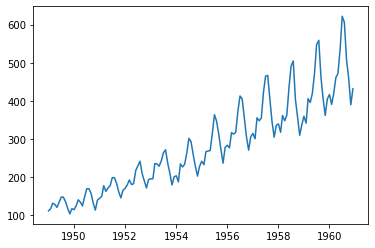

In [15]:
# Visualização da série temporal completa
plt.plot(ts)

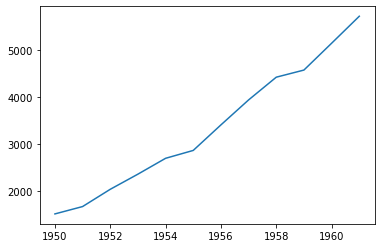

In [16]:
# Visualização por ano
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)

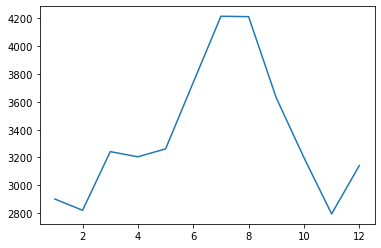

In [17]:
# Visualização por mês
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

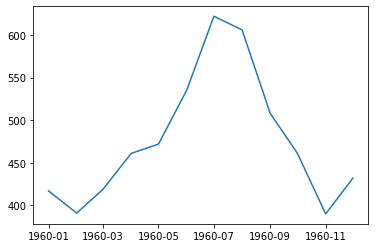

In [18]:
# Visualização entre datas específicas
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)

### Decomposição de uma série temporal

In [19]:
# Importação de bibliotecas
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
# Carregamento da base de dados, conversão do atributo para data e criação da série temporal (ts)
base = pd.read_csv('Dados/AirPassengers.csv')
dataparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('Dados/AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)
base

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


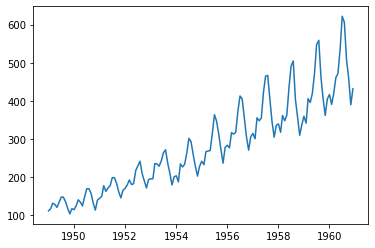

In [21]:
# Visualização da série temporal completa
plt.plot(ts)

In [22]:
# Decomposição da série temporal, criando uma variável para cada formato
decomposicao = seasonal_decompose(ts)

In [23]:
# Tendência
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [24]:
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [25]:
# Erro
aleatorio = decomposicao.resid
aleatorio

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

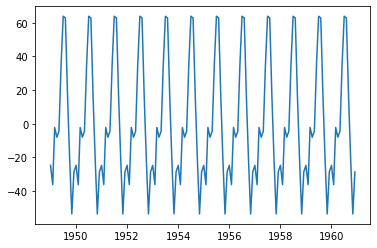

In [26]:
# Visualização de gráfico para cada formato de série temporal
plt.plot(sazonal)

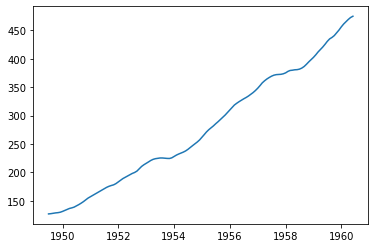

In [27]:
plt.plot(tendencia)

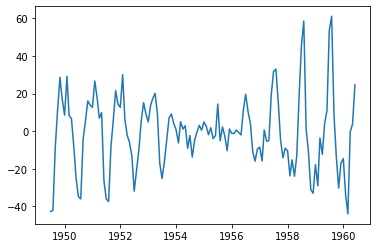

In [28]:
plt.plot(aleatorio)

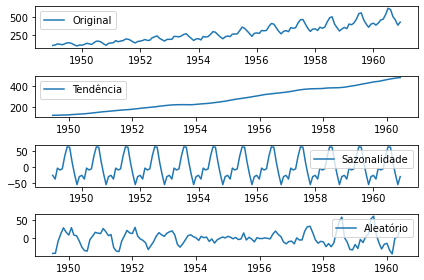

In [29]:
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

# Visualização somente da tendência
plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

# Visualização somente da sazonalidade
plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade')
plt.legend(loc = 'best')

# Visualização somente do elemento aleatório
plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aleatório')
plt.legend(loc = 'best')
plt.tight_layout()

### Previsão de séries temporais com ARIMA

In [30]:
# Importação de pacotes
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [31]:
# Carregamento da base de dados, conversão do atributo para data e criação da série temporal (ts)
base = pd.read_csv('Dados/AirPassengers.csv')
dataparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('Dados/AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)
base

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


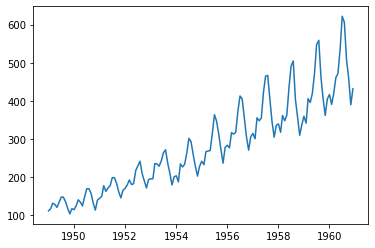

In [32]:
# Visualização da série temporal completa
plt.plot(ts)

In [33]:
# Criação do modelo ARIMA com os parâmetros p = 2, q = 1,  d = 2, treinamento e visualização dos resultados
modelo = ARIMA(ts, order=(2,1,2), freq=ts.index.inferred_freq)
modelo_treinado = modelo.fit()
modelo_treinado.summary()

C:\Users\Libania\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Libania\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_mode

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.712
Date:                Sat, 19 Feb 2022   AIC                           1344.043
Time:                        20:56:18   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5308      0.708      3.573      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.934      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.881      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9100      0.065    -29.498      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9998      0.068     14.796      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9551           -0.2964j            1.0001           -0.0479
MA.2            0.9551           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

In [34]:
# Previsão de 12 anos no futuro
previsoes = modelo_treinado.forecast(steps = 12)[0]
previsoes

array([433.10525519, 450.86283301, 479.77943838, 511.93928558,
       539.29502048, 555.78552262, 558.74207128, 549.27937323,
       531.66109334, 511.89882687, 496.0205907 , 488.4918861 ])

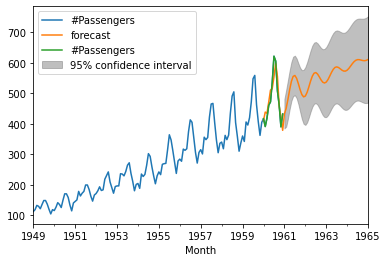

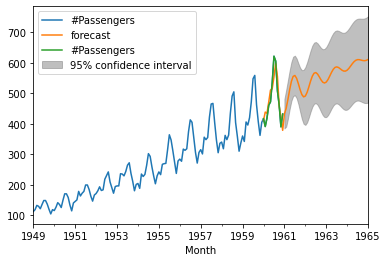

In [35]:
# Criação de um eixo para a série temporal completa, com adição das previsões do modelo
# lot_insample = True dados originais
eixo = ts.plot()
modelo_treinado.plot_predict('1960-01-01', '1965-01-01', ax = eixo, plot_insample = True)

In [36]:
# Implementação do Auto ARIMA para descoberta automática dos parâmetros
modelo_auto = auto_arima(ts, m = 12, seazonal = True, trace = False)
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Sat, 19 Feb 2022   AIC                           1017.847
Time:                                     20:56:27   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.601      0.000      -1.057      -0.907
sigma2       129.3130     14.556      8.884      0.000     100.783     157.843
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
proximos_12 = modelo_auto.predict(n_periods = 12)
# Visualização dos proximos 12 valores
proximos_12

array([445.63488087, 420.3949451 , 449.19824485, 491.83985608,
       503.39436987, 566.86232937, 654.26004163, 638.59734162,
       540.88358496, 494.12645479, 423.33253479, 465.50739497])